# Assignment Code: DS-AG-019
# Neural Network - A Simple Perceptron
----------

---






**Question 1**  :  What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

**Answer:**

Deep Learning is a subset of Machine Learning that uses artificial neural networks with multiple hidden layers to automatically learn complex patterns from large amounts of data. It is inspired by the structure and functioning of the human brain.

***Evolution of Deep Learning:***

* 1950s–60s: Introduction of the Perceptron

* 1980s: Backpropagation algorithm enabled training of neural networks

* 2000s: Increased data availability and GPU computing

* 2012 onwards: Breakthroughs in image and speech recognition using deep neural networks

**Difference Between Traditional ML and Deep Learning:**

| Aspect             | Traditional ML  | Deep Learning       |
| ------------------ | --------------- | ------------------- |
| Feature extraction | Manual          | Automatic           |
| Data requirement   | Small to medium | Very large          |
| Model complexity   | Simple          | Very complex        |
| Use cases          | Structured data | Images, audio, text |


**Question 2:** Explain the basic architecture and functioning of a Perceptron. What are its limitations?

**Answer:**

A Perceptron is the simplest neural network model, consisting of:

* Input nodes

* Weights

* Bias

* Activation function

* Output

**Working:**

Inputs are multiplied by weights

Bias is added

Activation function determines output

Mathematically:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$
**Limitations:**

Can only solve linearly separable problems

Cannot solve XOR problem

Single output only

No hidden layers


**Question 3**: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

**Answer:**

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns.

**Comparison:**
| Function | Formula           | Range   | Pros                 | Cons               |
| -------- | ----------------- | ------- | -------------------- | ------------------ |
| Sigmoid  | 1/(1+e⁻ˣ)         | 0 to 1  | Probabilistic output | Vanishing gradient |
| ReLU     | max(0,x)          | 0 to ∞  | Fast, efficient      | Dead neurons       |
| Tanh     | (eˣ−e⁻ˣ)/(eˣ+e⁻ˣ) | −1 to 1 | Zero centered        | Vanishing gradient |



**Question 4**: What is the difference between Loss function and Cost function in neural networks? Provide examples.

**Answer**
| Loss Function        | Cost Function              |
| -------------------- | -------------------------- |
| Error for one sample | Average error over dataset |
| Used during training | Used for model evaluation  |

**Examples:**

Loss: Mean Squared Error (MSE) for one data point

Cost: Average MSE over all samples

**Question 5**: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

**Answer:**

Optimizers adjust model weights to minimize the cost function.

| Optimizer        | 특징                                |
| ---------------- | --------------------------------- |
| Gradient Descent | Simple, slow convergence          |
| RMSprop          | Adaptive learning rate            |
| Adam             | Fast, combines momentum & RMSprop |

Adam is most commonly used due to faster convergence.

**Question 6**: Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.

In [1]:
import numpy as np

# AND gate data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

weights = np.random.rand(2)
bias = 0
lr = 0.1

def step(x):
    return 1 if x >= 0 else 0

# Training
for epoch in range(10):
    for i in range(len(X)):
        y_pred = step(np.dot(X[i], weights) + bias)
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

# Testing
for i in X:
    print(i, "->", step(np.dot(i, weights) + bias))


[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


**Question 7**: Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.

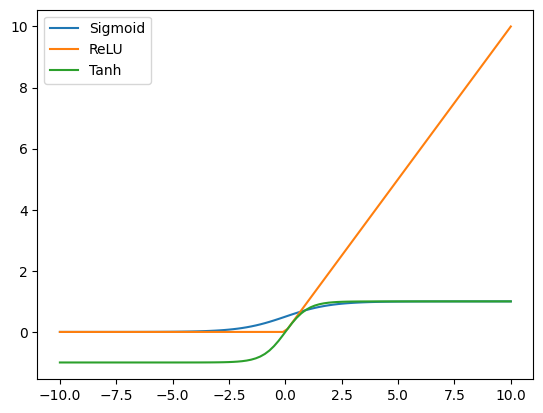

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.show()


**Question 8**: Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5)

print("Training Accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8783 - loss: 0.4340
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9647 - loss: 0.1212
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9762 - loss: 0.0800
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0566
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0447
Training Accuracy: 0.986133337020874


**Question 9**: Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7743 - loss: 0.8277
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8612 - loss: 0.3865
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8753 - loss: 0.3436
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8835 - loss: 0.3181
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8880 - loss: 0.2999


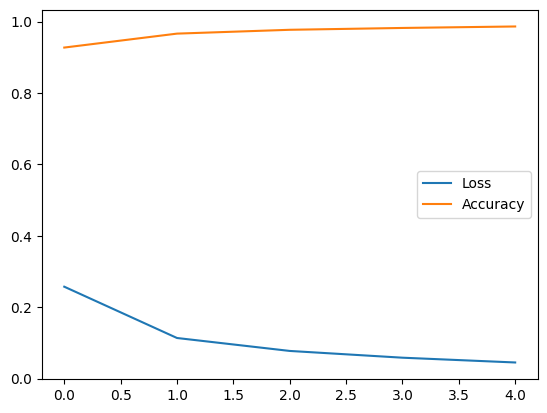

In [5]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0

model.fit(X_train, y_train, epochs=5)

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()


**Interpretation:**

Loss decreases → model learning

Accuracy increases → improved performance

Stable curves indicate good generalization

**Question 10**: You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow: \
● How would you design a deep learning model (perceptron or multilayer NN)? \
● Which activation function and loss function would you use, and why? \
● How would you train and evaluate the model, considering class imbalance? \
● Which optimizer would be suitable, and how would you prevent overfitting?

**Answer:**

***Model Design:***

Multilayer Neural Network

Input → Hidden layers (ReLU) → Output (Sigmoid)

***Activation & Loss:***

Hidden layers: ReLU

Output: Sigmoid

Loss: Binary Cross-Entropy

***Handling Imbalance:***

Class weights

SMOTE

Precision, Recall, ROC-AUC

***Optimizer & Overfitting Control:***

Optimizer: Adam

Techniques:

Dropout

Early stopping

L2 regularization

***Sample Code:***

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
